In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Adding dataset from kaggle to jupyter

In [3]:
#!pip install opendatasets

In [4]:
#import opendatasets as od

In [5]:
#od.download("https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction/")

In [6]:
#importing important packages

import pandas as pd
import numpy as np

In [7]:
insurance_data = pd.read_csv('insurance-premium-prediction/insurance.csv')

In [8]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
insurance_data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [12]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [14]:
insurance_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
insurance_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
insurance_data.bmi.value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
39.0     1
40.8     1
20.3     1
18.5     1
53.1     1
Name: bmi, Length: 275, dtype: int64

In [18]:
#importing packages for visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<Figure size 1500x600 with 0 Axes>

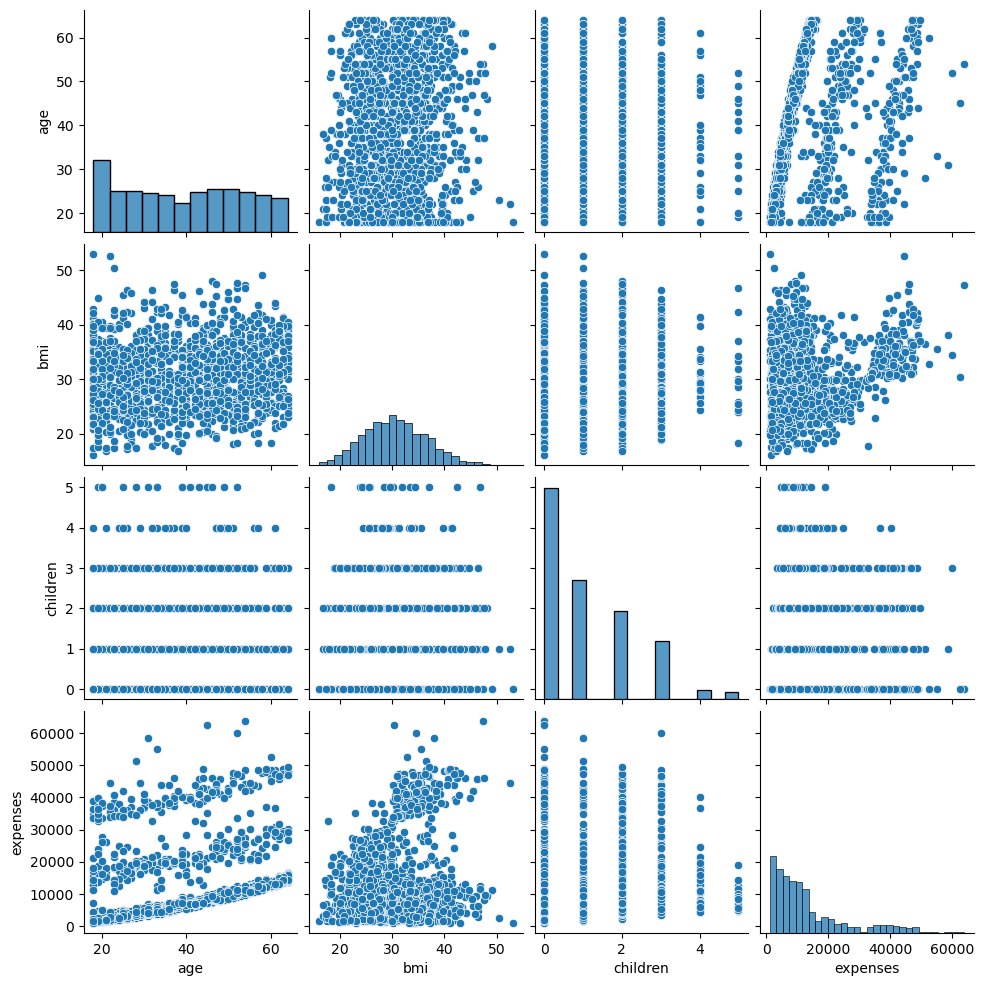

In [19]:
#pairplot

plt.figure(figsize = (15,6))
sns.pairplot(insurance_data)

<Axes: >

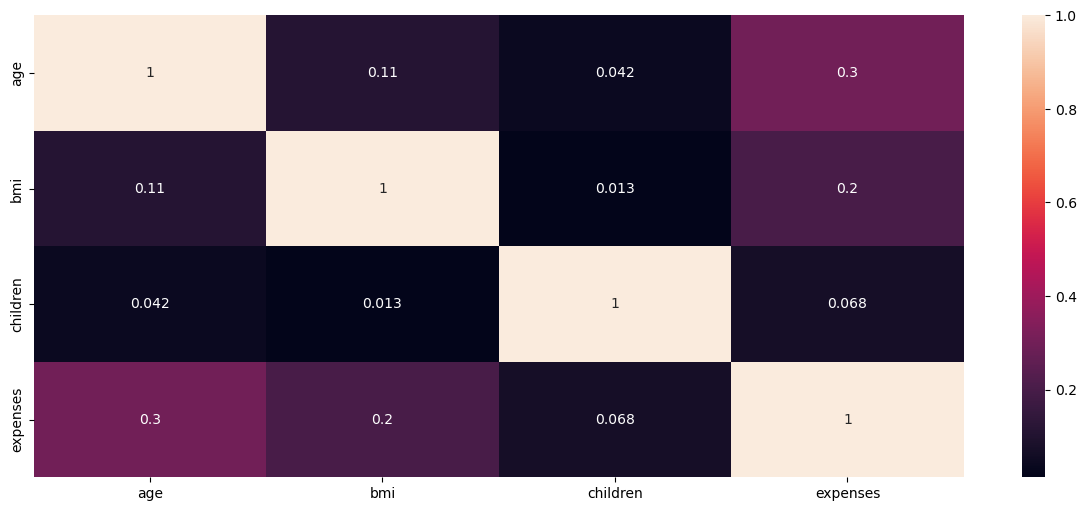

In [20]:
#heatmap

plt.figure(figsize = (15,6))
sns.heatmap(data = insurance_data.corr(),annot = True)

In [21]:
#distplot

<Axes: xlabel='age', ylabel='Density'>

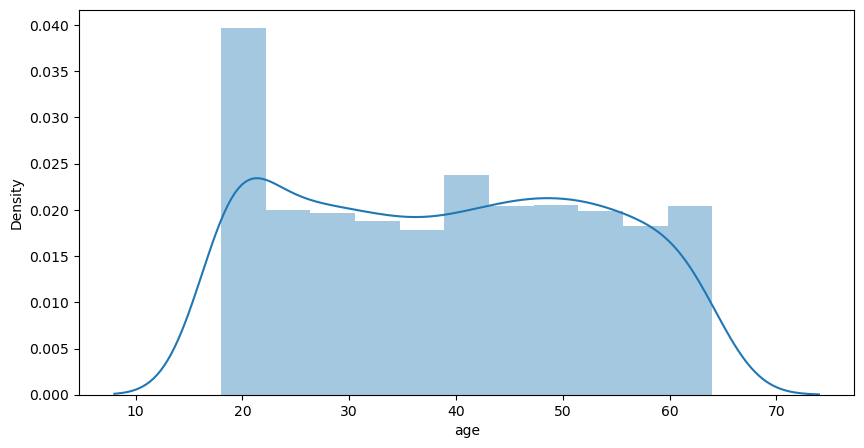

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(insurance_data.age)

<Axes: xlabel='children', ylabel='Density'>

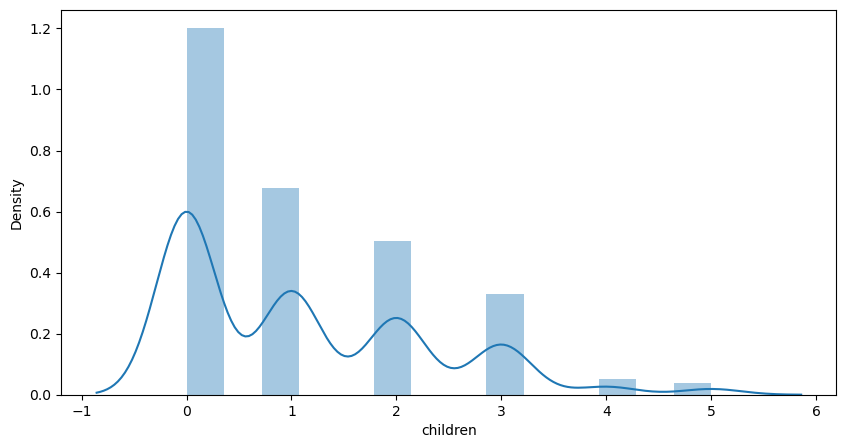

In [23]:
plt.figure(figsize = (10,5))
sns.distplot(insurance_data.children)

<Axes: xlabel='expenses', ylabel='Density'>

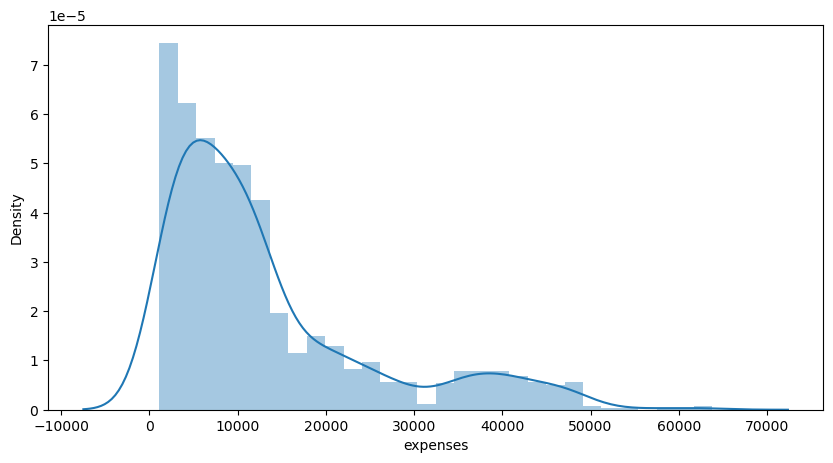

In [24]:
plt.figure(figsize = (10,5))
sns.distplot(insurance_data.expenses)

In [25]:
#countplot

<Axes: xlabel='age', ylabel='count'>

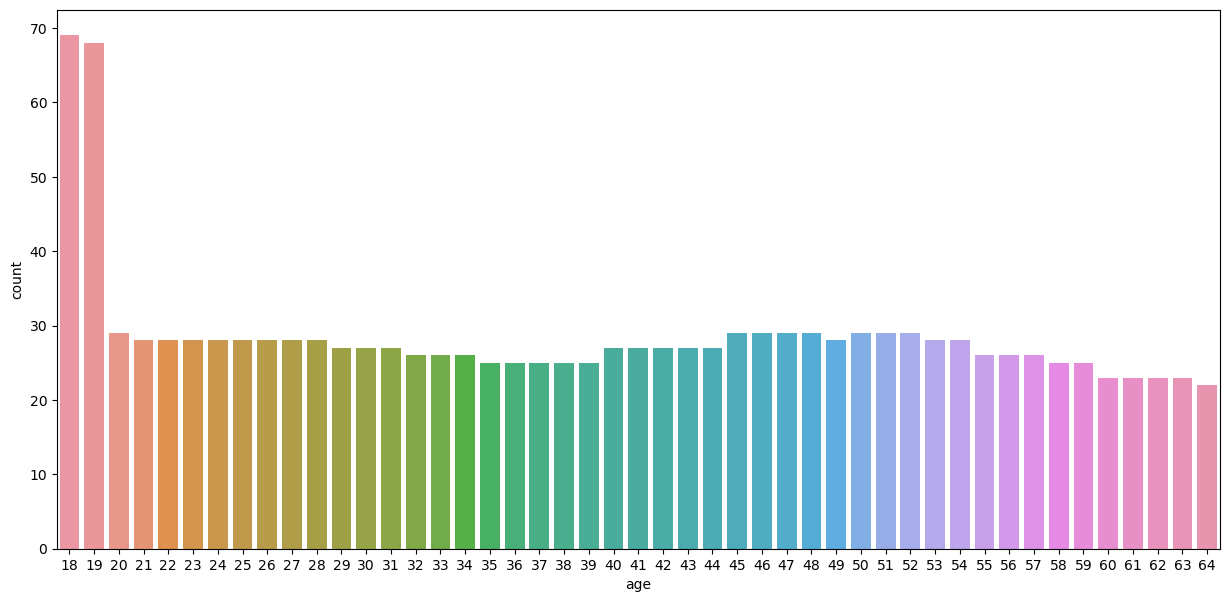

In [26]:
plt.figure(figsize =(15,7))
sns.countplot(x = insurance_data['age'])

<Axes: xlabel='children', ylabel='count'>

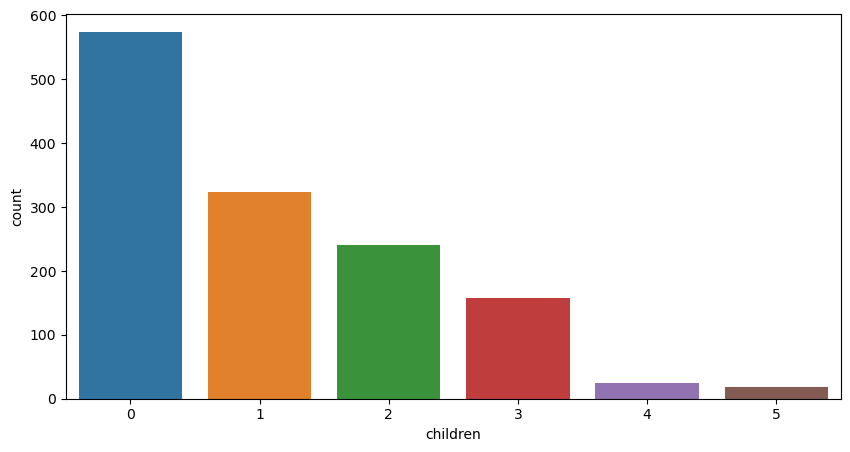

In [27]:
plt.figure(figsize =(10,5))
sns.countplot(x = insurance_data['children'])

<Axes: xlabel='sex', ylabel='count'>

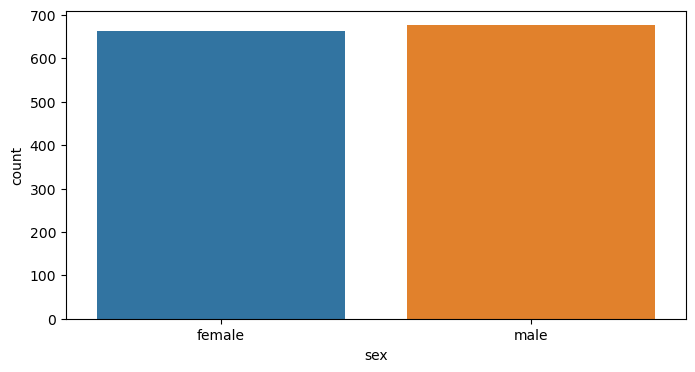

In [28]:
plt.figure(figsize =(8,4))
sns.countplot(x = insurance_data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

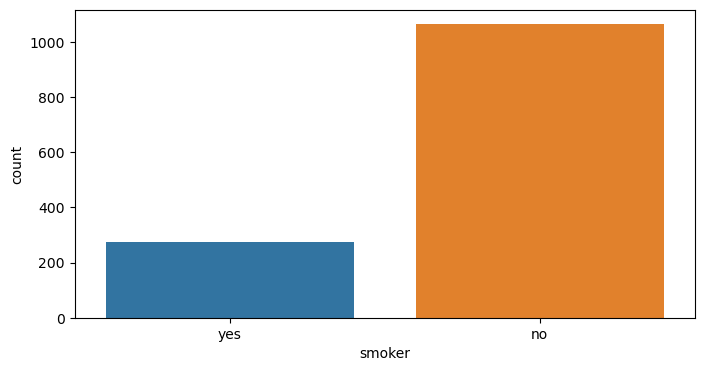

In [29]:
plt.figure(figsize =(8,4))
sns.countplot(x = insurance_data['smoker'])

<Axes: xlabel='region', ylabel='count'>

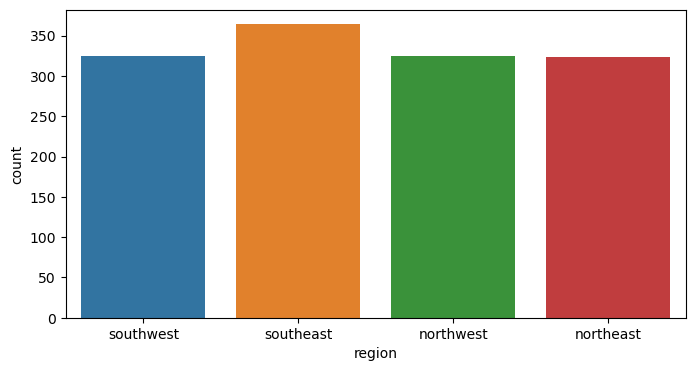

In [30]:
plt.figure(figsize =(8,4))
sns.countplot(x = insurance_data['region'])

In [31]:
#boxplot

<Axes: ylabel='age'>

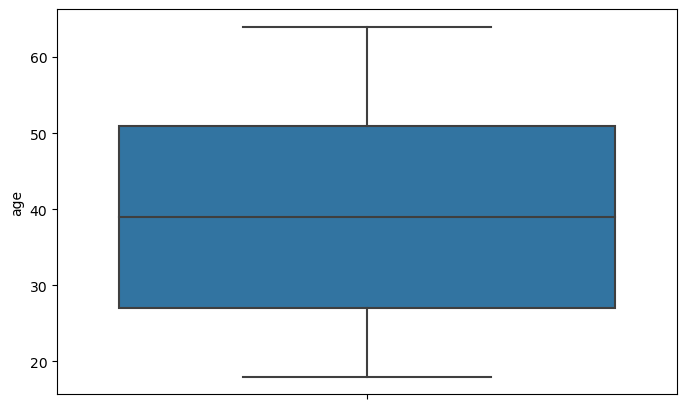

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(y = 'age',data=insurance_data)

<Axes: ylabel='bmi'>

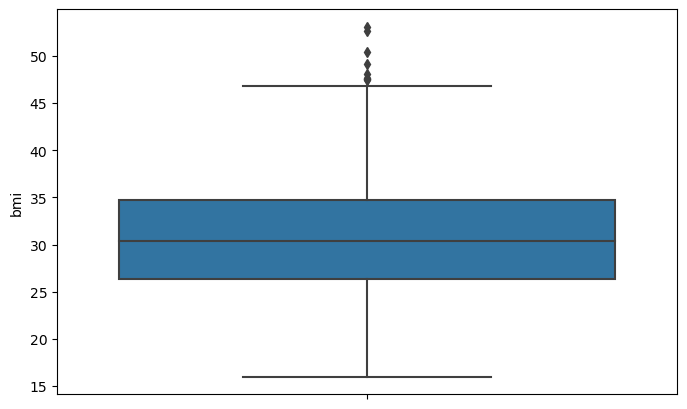

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(y = 'bmi',data=insurance_data)

<Axes: ylabel='expenses'>

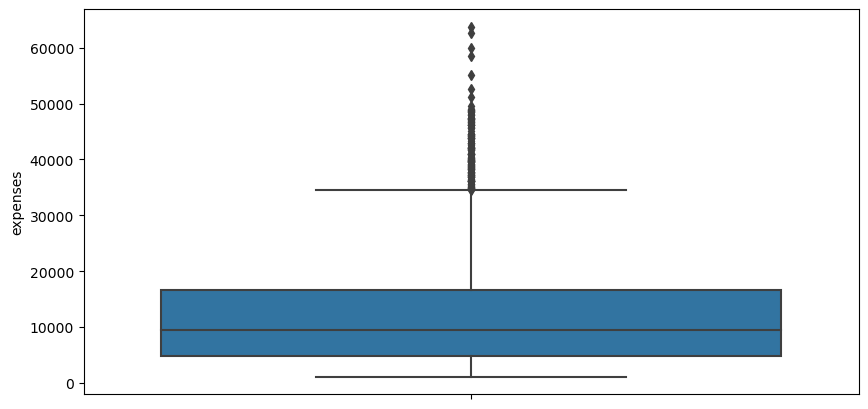

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(y = 'expenses',data=insurance_data)

In [35]:
#encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label  = LabelEncoder()

In [38]:
insurance_data['sex'] = label.fit_transform(insurance_data['sex'])

In [39]:
insurance_data['smoker'] = label.fit_transform(insurance_data['smoker'])

In [40]:
insurance_data['region'] = label.fit_transform(insurance_data['region'])

In [41]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [42]:
label.fit_transform(np.array(['sex']))

array([0], dtype=int64)

In [43]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [44]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [45]:
#from sklearn.preprocessing import MinMaxScaler

In [46]:
#scaler = MinMaxScaler()

In [47]:
#insurance_scaled= pd.DataFrame(scaler.fit_transform(insurance_data))

In [48]:
#insurance_scaled.columns = insurance_data.columns
#insurance_scaled.index = insurance_data.index

In [49]:
#insurance_scaled.head()

In [50]:
#X = insurance_scaled.drop('expenses',axis = 1)
#y = insurance_scaled['expenses']

In [51]:
X = insurance_data.drop('expenses',axis = 1)
y = insurance_data['expenses']

In [52]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [53]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [57]:
#Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
insurance_linear_reg = LinearRegression()
insurance_linear_reg.fit(X_train,y_train)
y_pred_lr = insurance_linear_reg.predict(X_test)

In [60]:
acc_lr = round(insurance_linear_reg.score(X_train, y_train) * 100, 2)
acc_lr

74.23

In [61]:
print('*********** Linear regression ***************************')
print("Mean Square Error : ")
print(mean_squared_error(y_pred_lr,y_test))
print("R2 Square : ")
print(r2_score(y_pred_lr,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(y_pred_lr,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(y_pred_lr,y_test)))

*********** Linear regression ***************************
Mean Square Error : 
33802383.55494205
R2 Square : 
0.6950613319239405
Mean Absolute Error : 
4154.7003872579335
Root Mean Square Error : 
5813.9817298424705


In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
insurance_knn = KNeighborsRegressor(n_neighbors = 4)
insurance_knn.fit(X_train,y_train)
y_pred_knn = insurance_knn.predict(X_test)

In [64]:
acc_knn = round(insurance_knn.score(X_train, y_train) * 100, 2)
acc_knn

43.87

In [65]:
print('*********** K-Nearest Neighbour ***************************')
print("Mean Square Error : ")
print(mean_squared_error(y_pred_knn,y_test))
print("R2 Square : ")
print(r2_score(y_pred_knn,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(y_pred_knn,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(y_pred_knn,y_test)))

*********** K-Nearest Neighbour ***************************
Mean Square Error : 
124120441.9256197
R2 Square : 
-1.87220749333336
Mean Absolute Error : 
7468.628700248756
Root Mean Square Error : 
11140.935415198299


In [66]:
from sklearn.svm import SVR,LinearSVR

In [67]:
insurance_linear_svr = LinearSVR()
insurance_linear_svr.fit(X_train,y_train)
y_pred_linear_svr = insurance_linear_svr.predict(X_test)

In [68]:
acc_linear_SVR = round(insurance_linear_svr.score(X_train, y_train) * 100, 2)
acc_linear_SVR

-14.61

In [69]:
print('*********** Linear SVR ***************************')
print("Mean Square Error : ")
print(mean_squared_error(y_pred_linear_svr,y_test))
print("R2 Square : ")
print(r2_score(y_pred_linear_svr,y_test) )
print("Mean Absolute Error : ")
print(mean_absolute_error(y_pred_linear_svr,y_test), end='\n')
print("Root Mean Square Error : ")
print(np.sqrt(mean_squared_error(y_pred_linear_svr,y_test)))

*********** Linear SVR ***************************
Mean Square Error : 
161887033.83729732
R2 Square : 
-12.582117097005952
Mean Absolute Error : 
6466.1078169883895
Root Mean Square Error : 
12723.483557473453


In [70]:
import xgboost as xgb

In [71]:
insurance_xgb = xgb.XGBRegressor()
insurance_xgb.fit(X_train,y_train)
y_pred_xgb = insurance_xgb.predict(X_test)

In [72]:
print('Accuracy of XGBoost : ',round(insurance_xgb.score(X_train,y_train)*100,2))

Accuracy of XGBoost :  99.63


In [73]:
print('**************** XG Boost *****************')
print('Mean Square Error : ',mean_squared_error(y_pred_xgb,y_test))
print('R2 Square : ',r2_score(y_pred_xgb,y_test))
print('Mean Absolute Error : ',mean_absolute_error(y_pred_xgb,y_test))
print('Root Mean Square Error : ',np.sqrt(mean_squared_error(y_pred_xgb,y_test)))


**************** XG Boost *****************
Mean Square Error :  26384383.00783299
R2 Square :  0.8160020703914168
Mean Absolute Error :  2872.0047503297724
Root Mean Square Error :  5136.573080160837


In [75]:
!pip install lazypredict

In [76]:
from lazypredict.Supervised import LazyRegressor

In [77]:
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

In [78]:
models,predictions = reg.fit(X_train,X_test,y_train,y_test)

100%|██████████| 42/42 [00:19<00:00,  2.14it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 6
[LightGBM] [Info] Start training from score 13379.157434


In [82]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.86,0.86,4461.71,0.15
LGBMRegressor,0.85,0.85,4615.77,0.61
RandomForestRegressor,0.85,0.85,4620.66,0.45
HistGradientBoostingRegressor,0.85,0.85,4624.44,0.62
BaggingRegressor,0.84,0.84,4827.26,0.07
ExtraTreesRegressor,0.84,0.84,4879.34,0.33
AdaBoostRegressor,0.83,0.83,4955.22,0.10
KNeighborsRegressor,0.82,0.83,5027.52,0.03
XGBRegressor,0.82,0.82,5141.06,0.15


In [83]:
from lazypredict.Supervised import LazyClassifier

In [84]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_1,predictions_1 = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 76.97it/s]


In [85]:
models_1

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


In [86]:
import pickle

In [88]:
pickle.dump(insurance_xgb,open('model_xgb.pkl','wb'))

In [89]:
model = pickle.load(open('model_xgb.pkl','rb'))

In [90]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)